In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.utils

In [2]:
# Check the Matplotlib Version 
print ("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 2.2.2


In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [4]:
# #############################################################################
# Read data
file_url = 'rotated_filtered_2.csv'
df = pd.read_csv(file_url)
df.head()

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,label
0,0,316013007,2017-01-01T00:56:16,44.23262,-76.47705,-0.1,-49.6,101.0,WOLFE ISLANDER III,IMO7423079,VA3418,WOLFE ISLANDER III,under way using engine,62.49,20.27,2.3,60,1
1,2,316013007,2017-01-01T01:13:57,44.22087,-76.45892,-0.1,-49.6,104.0,WOLFE ISLANDER III,IMO7423079,VA3418,WOLFE ISLANDER III,under way using engine,62.49,20.27,2.3,60,1
2,3,316013007,2017-01-01T01:13:57,44.22535,-76.45320,-0.1,-49.6,194.0,WOLFE ISLANDER III,IMO7423079,VA3418,WOLFE ISLANDER III,under way using engine,62.49,20.27,2.3,60,-1
3,4,316013007,2017-01-01T03:38:21,44.21534,-76.42604,-0.1,-49.6,115.0,WOLFE ISLANDER III,IMO7423079,VA3418,WOLFE ISLANDER III,under way using engine,62.49,20.27,2.3,60,1
4,5,316013007,2017-01-01T03:38:21,44.19247,-76.45873,-0.1,-49.6,205.0,WOLFE ISLANDER III,IMO7423079,VA3418,WOLFE ISLANDER III,under way using engine,62.49,20.27,2.3,60,-1


In [5]:
two_D_Data = df[["LAT", "LON"]]
two_D_Data = StandardScaler().fit_transform(two_D_Data)
two_D_Data.shape

(1598, 2)

In [6]:
five_D_Data = df[["LAT", "LON", "SOG", "COG", "Heading"]]
five_D_Data = StandardScaler().fit_transform(five_D_Data)
five_D_Data.shape

(1598, 5)

In [7]:
# #############################################################################
# Compute DBSCAN 2D
db2 = DBSCAN(eps=0.2, min_samples=30).fit(two_D_Data)
core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask[db2.core_sample_indices_] = True
labels2 = db2.labels_

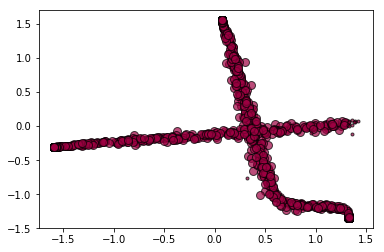

In [8]:
# Black removed and is used for noise instead.
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels2 == k)

    xy = two_D_Data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8, alpha=0.7)

    xy = two_D_Data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3, alpha=0.7)

plt.show()

In [9]:
# #############################################################################
# Compute DBSCAN 5D
db5 = DBSCAN(eps=0.2, min_samples=30).fit(five_D_Data)
core_samples_mask = np.zeros_like(db5.labels_, dtype=bool)
core_samples_mask[db5.core_sample_indices_] = True
labels5 = db5.labels_

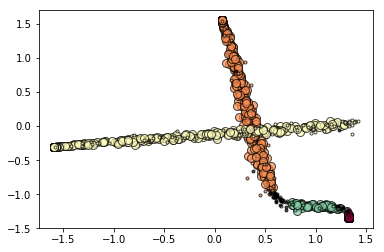

In [10]:
# Black removed and is used for noise instead.
unique_labels = set(labels5)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels5 == k)

    xy = five_D_Data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8, alpha=0.7)

    xy = five_D_Data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3, alpha=0.7)

plt.show()

In [11]:
df['label'] = labels2
df.to_csv('result1.csv')

In [12]:
df['label'] = labels5
df.to_csv('result2.csv')

In [302]:
# #############################################################################
# Read data
file_url = 'Testing_Data_dup.csv'
df = pd.read_csv(file_url)
df.head()

C:\Users\62707\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,316013007,2017-01-01T00:01:10,44.23262,-76.47704,-0.1,-49.6,100,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60
1,316013007,2017-01-01T00:02:17,44.23264,-76.47541,-0.1,-49.6,120,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60
2,316013007,2017-01-01T00:03:25,44.23064,-76.47384,-0.1,-49.6,172,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60
3,316013007,2017-01-01T00:04:27,44.22846,-76.47331,-0.1,-49.6,179,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60
4,316013007,2017-01-01T00:05:38,44.22577,-76.47337,-0.1,-49.6,184,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60


In [259]:
two_D_Data = df[["LAT", "LON"]]
two_D_Data = StandardScaler().fit_transform(two_D_Data)
two_D_Data.shape

(39891, 2)

In [260]:
# #############################################################################
# Compute DBSCAN 2D
db2 = DBSCAN(eps=0.1, min_samples=40).fit(two_D_Data)
core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask[db2.core_sample_indices_] = True
labels2 = db2.labels_

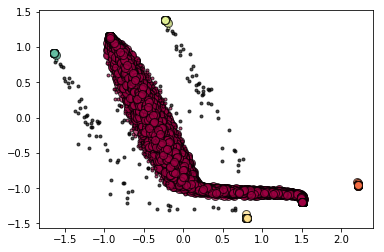

In [261]:
# Black removed and is used for noise instead.
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels2 == k)

    xy = two_D_Data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8, alpha=0.7)

    xy = two_D_Data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3, alpha=0.7)

plt.show()

In [303]:
five_D_Data = df[["LAT", "LON", "SOG", "COG", "Heading"]]
five_D_Data = StandardScaler().fit_transform(five_D_Data)
five_D_Data.shape

(39891, 5)

In [304]:
# #############################################################################
# Compute DBSCAN 5D
db5 = DBSCAN(eps=0.1, min_samples=40).fit(five_D_Data)
core_samples_mask = np.zeros_like(db5.labels_, dtype=bool)
core_samples_mask[db5.core_sample_indices_] = True
labels5 = db5.labels_

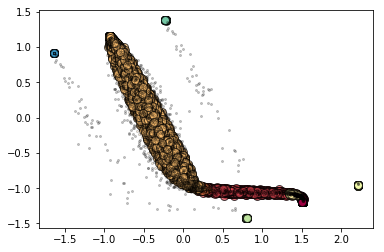

In [305]:
# Black removed and is used for noise instead.
unique_labels = set(labels5)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels5 == k)

    xy = five_D_Data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8, alpha=0.7)

    xy = five_D_Data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2, alpha=0.2)

plt.show()

In [306]:
df['label'] = labels5

In [307]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,label
0,316013007,2017-01-01T00:01:10,44.23262,-76.47704,-0.1,-49.6,100,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60,0
1,316013007,2017-01-01T00:02:17,44.23264,-76.47541,-0.1,-49.6,120,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60,-1
2,316013007,2017-01-01T00:03:25,44.23064,-76.47384,-0.1,-49.6,172,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60,1
3,316013007,2017-01-01T00:04:27,44.22846,-76.47331,-0.1,-49.6,179,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60,1
4,316013007,2017-01-01T00:05:38,44.22577,-76.47337,-0.1,-49.6,184,WOLFE ISLANDER III,IMO7423079,VA3418,1018,under way using engine,62.49,20.27,2.3,60,-1


In [308]:
df.to_csv('result4.csv')

In [2]:
# #############################################################################
# Read data
file_url = 'rotated.csv'
df = pd.read_csv(file_url)

In [3]:
df = df[df['LAT']<=44.234]

In [4]:
df.to_csv('rotated_filtered.csv')